In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#read in product information
products = pd.read_csv('C:/DS/Springboard/1st_capstone_project/products/products.csv')


In [3]:
#check order information
df_pr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__prior/order_products__prior.csv')
df_tr = pd.read_csv('C:/DS/Springboard/1st_capstone_project/order_products__train/order_products__train.csv')

# Part 1: Data Wrangling 

In [76]:
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')

In [5]:
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [120]:
test_df = ord_df[ord_df['eval_set']=='test']
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 38 to 3421068
Data columns (total 7 columns):
order_id                  75000 non-null int64
user_id                   75000 non-null int64
eval_set                  75000 non-null object
order_number              75000 non-null int64
order_dow                 75000 non-null int64
order_hour_of_day         75000 non-null int64
days_since_prior_order    75000 non-null float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.6+ MB


In [6]:
print(len(ord_df[ord_df['eval_set']=='prior']))
print(len(ord_df[ord_df['eval_set']=='train']))
print(len(ord_df[ord_df['eval_set']=='test']))

3214874
131209
75000


In [7]:
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


In [8]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
#check for missing value
print(df_pr.isna().sum())
print(df_tr.isna().sum())
print(ord_df.isna().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


In [10]:
# check relationship between prior and train dataset
ord_df[ord_df['user_id']==1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [11]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [12]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [13]:
#check difference between prior, test and train
#user id count
ord_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


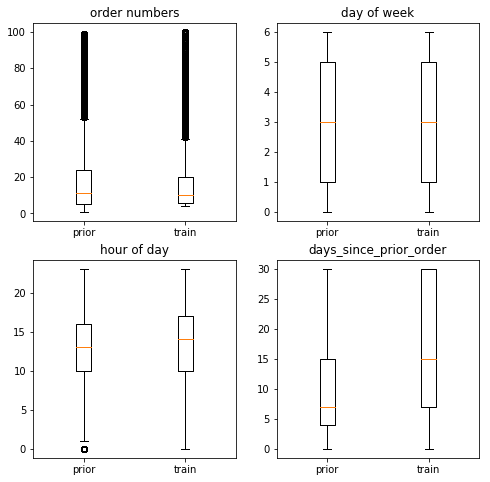

In [14]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number']])
a.set_xticks([1,2])
a.set_xticklabels(['prior','train'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow']])
b.set_xticks([1,2])
b.set_xticklabels(['prior','train'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day']])
c.set_xticks([1,2])
c.set_xticklabels(['prior','train'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),ord_df[ord_df['eval_set']=='train']['days_since_prior_order']])
d.set_xticks([1,2])
d.set_xticklabels(['prior','train'])
d.set_title('days_since_prior_order')
plt.show()

# Findings: 
1. order.csv includes information on orders such as order id in database, order number for this user, user id, which set it belongs to (prior, test or training) and when it happens(day of week, order time of day, days since prior order)
2. orders_products datasets store information on each order, including order id, product id, add to cart order and whether it is a reorder
3. The only missing value in the datset is "days since prior order" for some orders in prior set since they are first time orders.
4. There are no outliers found.
5. Users in prior set are divided to training and test sets.
6. For users in the training set, one order is hold out in the training set and the rest orders are in prior.

# Part 2: Exploratory Data Analysis

In [15]:
import seaborn as sns
color = sns.color_palette()


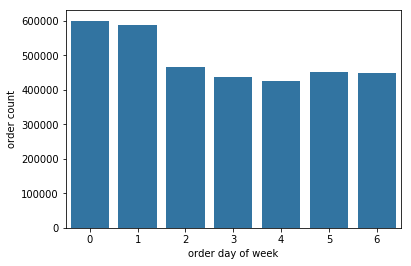

In [16]:
#when users usually order
sns.countplot(x='order_dow',data=ord_df,color=color[0])
plt.xlabel('order day of week')
plt.ylabel('order count')
plt.show()

<div class="alert alert-success">
- Day 0 and 1 have higher orders, they should be Saturday and Sunday. Wednesday has the lowest order counts.
</div>

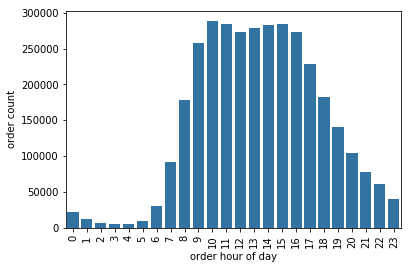

In [17]:
# what time customers order
sns.countplot(x="order_hour_of_day", data=ord_df,color=color[0])
plt.xlabel('order hour of day')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Most orders happen during daytime about 9 am - 4 pm
</div>

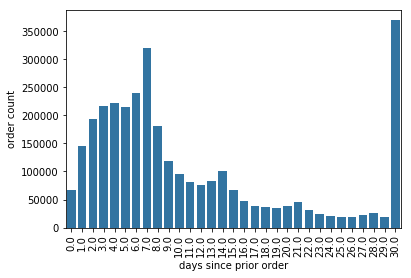

In [18]:
# frequency of customers ordering
sns.countplot(x="days_since_prior_order", data=ord_df,color=color[0])

plt.xlabel('days since prior order')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Customers most likely order again after 30 days since prior order, followed by 7 days. 
</div>

In [19]:
# proportion of orders that are reorders
pr_reord = df_pr['reordered'].sum()/len(df_pr)
tr_reord = df_tr['reordered'].sum()/len(df_tr)
print("percentage of reorder in prior set is:",pr_reord)
print("percentage of reorder in test set is:",tr_reord)

percentage of reorder in prior set is: 0.5896974667922161
percentage of reorder in test set is: 0.5985944127509629


<div class="alert alert-success">
About 59% of the orders are reorder
</div>

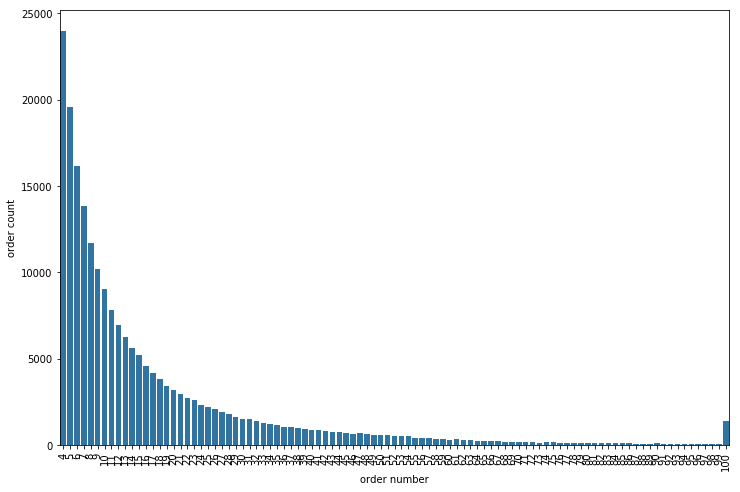

In [20]:
# how many orders customer make
pr_no = ord_df.groupby('user_id')['order_number'].max().reset_index(name='orders_total')
plt.figure(figsize=(12,8))
sns.countplot(x="orders_total", data=pr_no,color=color[0])
plt.xlabel('order number')
plt.ylabel('order count')
plt.xticks(rotation='vertical')
plt.show()

<div class="alert alert-success">
Customers make at least 4 orders and at most 100 orders. 
</div>

In [21]:
# extract order df using test data and most recent 3 orders in prior dataset 
# each user ends up with 4 orders to train the model
ord_df = ord_df[ord_df['eval_set']!='test'].merge(pr_no,on='user_id',how='left')
ord_df = ord_df[ord_df.order_number > (ord_df.orders_total - 4)].reset_index()
ord_df.drop(['index','orders_total'],axis=1,inplace=True)
print(len(ord_df))
ord_df.head()

749836


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,3108588,1,prior,8,1,14,14.0
1,2295261,1,prior,9,1,16,0.0
2,2550362,1,prior,10,4,8,30.0
3,1187899,1,train,11,4,8,14.0
4,3186735,2,prior,12,1,9,28.0


In [22]:
department = pd.read_csv('C:/DS/Springboard/1st_capstone_project/departments/departments.csv')
aisle = pd.read_csv('C:/DS/Springboard/1st_capstone_project/aisles/aisles.csv')

In [23]:
#product-order dataframe with department and aisle info
pr_ord = pd.concat([pd.merge(df_pr,ord_df,on='order_id',how='left'),pd.merge(df_tr,ord_df,on='order_id',how='left')])
pr_ord.dropna(inplace=True)
print(len(pr_ord))
pr_ord = pr_ord.merge(products,on='product_id',how='left')
pr_ord.replace({'prior':1,'train':2},inplace=True) #convert object column to integer to save space
print(pr_ord.head())
print(pr_ord.info(memory_usage='deep'))

7506157
   order_id  product_id  add_to_cart_order  reordered   user_id  eval_set  \
0         7       34050                  1          0  142903.0         1   
1         7       46802                  2          0  142903.0         1   
2        14       20392                  1          1   18194.0         1   
3        14       27845                  2          1   18194.0         1   
4        14         162                  3          1   18194.0         1   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0          11.0        2.0               14.0                    30.0   
1          11.0        2.0               14.0                    30.0   
2          49.0        3.0               15.0                     3.0   
3          49.0        3.0               15.0                     3.0   
4          49.0        3.0               15.0                     3.0   

                     product_name  aisle_id  department_id  
0                    Orange J

                    index   count
0                  Banana  102968
1  Bag of Organic Bananas   84085
2    Organic Strawberries   54313
3    Organic Baby Spinach   53756
4             Large Lemon   41951


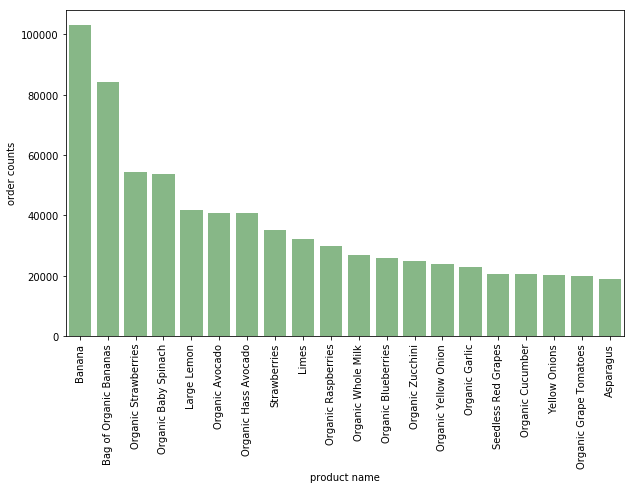

In [24]:
#check what products are ordered the most 
product_count_pr = pr_ord['product_name'].value_counts().reset_index(name="count")
print(product_count_pr.head())

fig = plt.figure(figsize=(10,6))

sns.barplot(x='index',y='count',data=product_count_pr.iloc[0:20,:],color='g',alpha=0.5)
plt.xlabel('product name')
plt.xticks(rotation='vertical')
plt.ylabel('order counts')

plt.show()

<div class="alert alert-success">
Most ordered products are fresh fruits and vegetables. 
</div>

                                   product_name  reorder_ratio
7919             Chips, Kale + Chia, Chili Lime            1.0
32099            Original Plain Wafers Crackers            1.0
24166                                  Mega Mag            1.0
2463   Apple And Pretzel Bites With Caramel Dip            1.0
24159                             Medjoul Dates            1.0


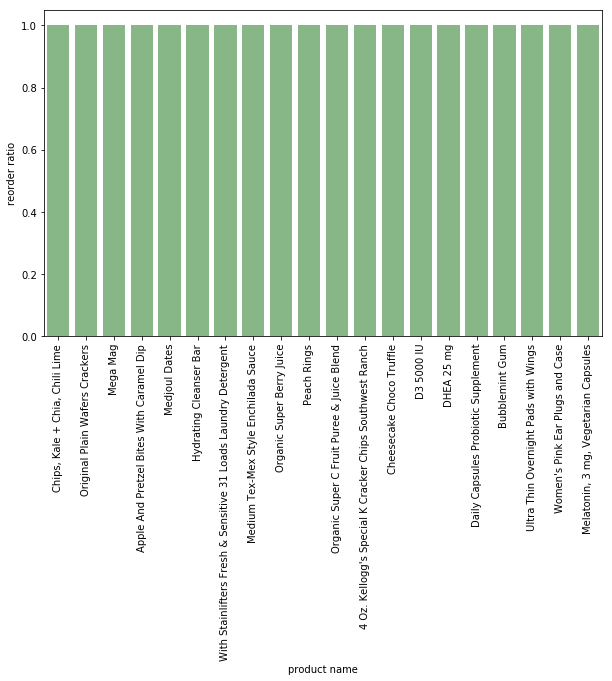

In [25]:
#products having highest reorder ratio
product_pr_reo = pr_ord.groupby('product_name')['reordered'].mean().reset_index(name='reorder_ratio').sort_values('reorder_ratio',ascending=False)
print(product_pr_reo.head())

fig = plt.figure(figsize=(10,6))

sns.barplot(x='product_name',y='reorder_ratio',data=product_pr_reo.iloc[0:20,:],color='g',alpha=0.5)
plt.xlabel('product name')
plt.xticks(rotation='vertical')
plt.ylabel('reorder ratio')
plt.show()


<div class="alert alert-success">
Products with high reorder ratio are those items whose buyers are "loyal" or have high preference to them. As seen from the plot above, most of the products with highest reorder ratio are kind of snacks, not daily necessaries. 
</div>

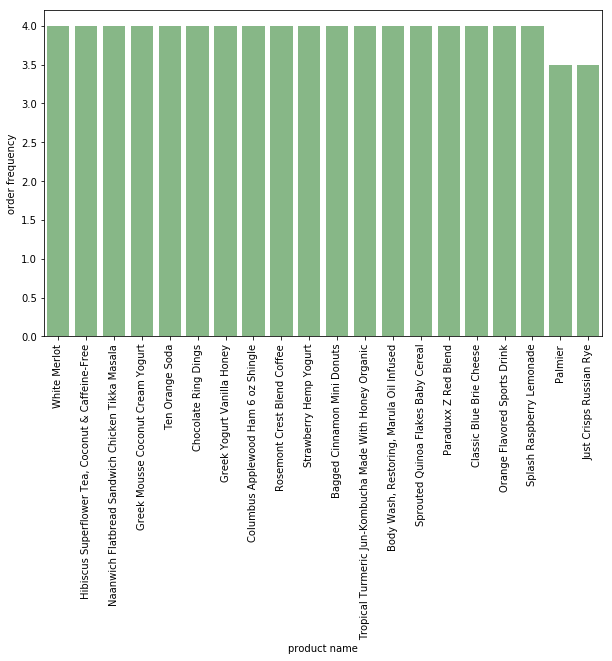

In [26]:
# product order frequency
product_freq = pr_ord.groupby(['user_id','product_id']).size().reset_index(name='freq')
product_freq_prod = product_freq.groupby('product_id')['freq'].mean().reset_index(name='prod_freq').sort_values('prod_freq',ascending=False)
pr_ord = pr_ord.merge(product_freq_prod,on='product_id',how='left').merge(product_freq,on=['user_id','product_id'],how='left')
product_freq_prod = product_freq_prod.merge(products,on='product_id',how='left')

fig = plt.figure(figsize=(10,6))
sns.barplot(x='product_name',y='prod_freq',data=product_freq_prod.iloc[0:20,:],color='g',alpha=0.5)
plt.xlabel('product name')
plt.xticks(rotation='vertical')
plt.ylabel('order frequency')
plt.show()

In [27]:
pr_ord.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506157 entries, 0 to 7506156
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
user_id                   float64
eval_set                  int64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
product_name              object
aisle_id                  int64
department_id             int64
prod_freq                 float64
freq                      int64
dtypes: float64(6), int64(8), object(1)
memory usage: 1.4 GB


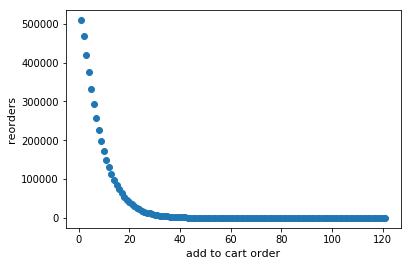

In [28]:
#check relationship between reorder times and add to cart order
df_pr_gp = pr_ord.groupby('add_to_cart_order')['reordered'].sum()
df_pr_gp = df_pr_gp.reset_index()
df_pr_gp.columns = ['add_to_cart_order','reorder_sum']

fig = plt.figure(figsize=(6,4))

plt.scatter(df_pr_gp['add_to_cart_order'],df_pr_gp['reorder_sum'])
plt.xlabel('add to cart order',fontsize=11)
plt.ylabel('reorders',fontsize=11)


plt.show()

<div class="alert alert-success">
There is a clear nonlinear pattern between reorder counts and add to cart orders. The products adding to cart first are reordered the most.
</div>

# What aisles and deparments have most reorders

    department_id  reorder_sum
3               4      1412214
15             16       777797
6               7       399760
     aisle_id  reorder_sum
23         24       580182
82         83       474099
122       123       264437


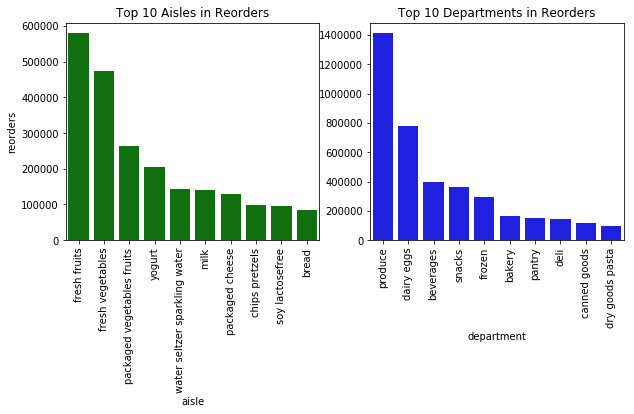

In [29]:
pr_dep = pr_ord.groupby('department_id')['reordered'].sum().reset_index(name='reorder_sum').sort_values('reorder_sum',ascending=False)
pr_ais = pr_ord.groupby('aisle_id')['reordered'].sum().reset_index(name='reorder_sum').sort_values('reorder_sum',ascending=False)
print(pr_dep.head(3))
print(pr_ais.head(3))
pr_dep = pr_dep.merge(department,on='department_id')
pr_ais = pr_ais.merge(aisle,on='aisle_id')

x = np.arange(0,10,1)
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
sns.barplot(x='aisle',y='reorder_sum',data=pr_ais.iloc[0:10,:],color='g')
a.set_title('Top 10 Aisles in Reorders',fontsize=12)
a.set_ylabel('reorders')
plt.xticks(rotation=90)


b = fig.add_subplot(122)
sns.barplot(x='department',y='reorder_sum',data=pr_dep.iloc[0:10,:],color='b')
b.set_title('Top 10 Departments in Reorders',fontsize=12)
b.set_ylabel('')
plt.xticks(rotation=90)


plt.show()

<div class="alert alert-success">
The most reordered aisles are fresh fruits and vegetables. The most reordered departments are produce and dairy eggs.
</div>

# department reorder ratio

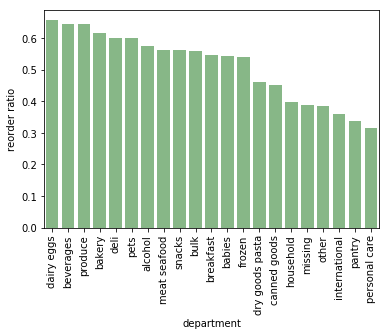

In [30]:
dep_reo = pr_ord.groupby('department_id')['reordered'].mean().reset_index(name='reorder_ratio').sort_values('reorder_ratio',ascending=False)
dep_reo = dep_reo.merge(department,on='department_id')
sns.barplot(x='department',y='reorder_ratio',data=dep_reo,color='g',alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('reorder ratio')
plt.show()

<div class="alert alert-success">
Reorder ratio is high in dairy eggs, beverages, and produce and lowest in personal care.
</div>

# customer reorder habits

In [31]:
pr_ord = pr_ord.dropna()  #remove rows of first time orders
pr_reorder = pr_ord.groupby('user_id')['reordered'].mean()
pr_reorder = pr_reorder.reset_index()
pr_reorder.columns = ['user_id','reorder_ratio']
print(pr_reorder.head())
user_1 = 100*len(pr_reorder[pr_reorder['reorder_ratio'] == 1])/len(pr_reorder)
user_0 = 100*round(len(pr_reorder[pr_reorder['reorder_ratio'] == 0])/len(pr_reorder),4)
print("There are","{:.2f}".format(user_1),"(%) customers always reorder what they buy before")
print("There are",user_0,"(%) customers never reorder what they buy before")

   user_id  reorder_ratio
0      1.0       0.812500
1      2.0       0.440000
2      3.0       0.941176
3      4.0       0.083333
4      5.0       0.514286
There are 3.27 (%) customers always reorder what they buy before
There are 1.08 (%) customers never reorder what they buy before


<div class="alert alert-success">
There are %3.27 customers always reorder what they buy before.  
There are %1.08 customers never reorder what they buy before
</div>

# Part 3: Feature selection


Four groups of feature are selected to predict whether a product will be reordered:  
1. User features:  
how many days between user's orders  
user order size (how many items the user buy in one order)   
order organic products 

2. Product features:  
product order frequency  
product purchase probability acorss a week  
product purchase probability in a day  
product add to cart order  
aisle  
department
3. User-product features:  
add to cart order at user level   
frequency of purchasing a product for a user

4. Date-time information:  
order dow  
order time  
days_since_prior_order



In [38]:
# user features
use_fea = pr_ord.groupby(['user_id']).agg({'days_since_prior_order':np.mean}).reset_index()
use_fea.columns = ['user_id','use_betw_days']
use_size = pr_ord.groupby(['user_id','order_number'])['product_id'].size().reset_index(name='order_size')
use_mean_size = use_size.groupby('user_id')['order_size'].mean().reset_index(name='order_size')
use_fea = use_fea.merge(use_mean_size,on='user_id',how='left')

# define custom function for organic items
pr_ord['is_organic'] = pr_ord['product_name'].map(lambda x: 'organic' in x.lower())
organic_perc = pr_ord.groupby('user_id')['is_organic'].sum()/(pr_ord.groupby('user_id')['product_id'].size())
organic_perc = organic_perc.reset_index(name='organic_perc')

#merge with other user features
use_fea = use_fea.merge(organic_perc,on='user_id',how='left')
print(use_fea.head())

   user_id  use_betw_days  order_size  organic_perc
0      1.0      15.875000    8.000000      0.281250
1      2.0      25.866667   18.750000      0.253333
2      3.0      14.529412    5.666667      0.411765
3      4.0      14.750000    4.000000      0.166667
4      5.0      12.314286    8.750000      0.457143


In [39]:
pr_ord.drop('product_name',axis=1,inplace=True) #remove unnecessary column to save space

pr_ord.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506157 entries, 0 to 7506156
Data columns (total 15 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
user_id                   float64
eval_set                  int64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
aisle_id                  int64
department_id             int64
prod_freq                 float64
freq                      int64
is_organic                bool
dtypes: bool(1), float64(6), int64(8)
memory usage: 866.2 MB


In [40]:
# product features
# reorder ratio, add to cart order
pro_fea = pr_ord.groupby(['product_id']).agg({'add_to_cart_order':np.mean}).reset_index()
pro_fea.columns = ['product_id','pro_add_to_card_order']
# purchase distribution acorss a week
pro_dow = pd.crosstab(pr_ord.product_id,pr_ord.order_dow).apply(lambda r: r/r.sum(), axis=1)
pro_dow = pro_dow.reset_index()
pro_dow.columns = ['product_id','dow_0','dow_1','dow_2','dow_3','dow_4','dow_5','dow_6']
print(pro_dow.head())
# purchase distribution across a day
pr_ord['hour_of_day_div'] = 0
pr_ord.loc[pr_ord.order_hour_of_day < 6,'hour_of_day_div'] = 'early'
pr_ord.loc[(pr_ord.order_hour_of_day > 5) & (pr_ord.order_hour_of_day < 12),'hour_of_day_div'] = 'morning'
pr_ord.loc[(pr_ord.order_hour_of_day > 11) & (pr_ord.order_hour_of_day < 18),'hour_of_day_div'] = 'afternoon'
pr_ord.loc[pr_ord.order_hour_of_day > 17,'hour_of_day_div'] = 'evening'
pro_hod = pd.crosstab(pr_ord.product_id,pr_ord.hour_of_day_div).apply(lambda r: r/r.sum(), axis=1)
pro_hod = pro_hod.reset_index()
print(pro_hod.head())
pro_fea = pro_fea.merge(pro_dow,on='product_id',how='left').merge(pro_hod,on='product_id',how='left')
print(pro_fea.head())

   product_id     dow_0     dow_1     dow_2     dow_3     dow_4     dow_5  \
0           1  0.105793  0.204030  0.153652  0.136020  0.158690  0.163728   
1           2  0.208333  0.166667  0.041667  0.166667  0.083333  0.083333   
2           3  0.142857  0.085714  0.114286  0.085714  0.114286  0.142857   
3           4  0.217391  0.165217  0.139130  0.130435  0.113043  0.078261   
4           5  0.000000  0.000000  0.000000  0.000000  0.000000  0.666667   

      dow_6  
0  0.078086  
1  0.250000  
2  0.314286  
3  0.156522  
4  0.333333  
hour_of_day_div  product_id  afternoon     early   evening   morning
0                         1   0.430730  0.012594  0.138539  0.418136
1                         2   0.375000  0.000000  0.166667  0.458333
2                         3   0.542857  0.057143  0.171429  0.228571
3                         4   0.486957  0.026087  0.217391  0.269565
4                         5   0.666667  0.000000  0.000000  0.333333
   product_id  pro_add_to_card_order   

In [42]:
# product-user properties
pro_use_fea = pr_ord.groupby(['product_id','user_id'])['add_to_cart_order'].mean().reset_index(name='pro_use_cart_order')
print(pro_use_fea.head())

   product_id  user_id  pro_use_cart_order
0           1    138.0                 1.0
1           1    751.0                 4.0
2           1    764.0                11.0
3           1    910.0                 1.0
4           1   1540.0                 3.0


In [43]:
# merge new features to product-order dataset
pr_ord.dropna(inplace=True)
pr_ord.drop('hour_of_day_div',axis=1,inplace=True) #remove unnecessary column to save space
pr_ord = pr_ord.merge(pro_fea,on='product_id',how='left').merge(use_fea,on='user_id',how='left').merge(pro_use_fea,on=['product_id','user_id'],how='left')
pr_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7506157 entries, 0 to 7506156
Data columns (total 31 columns):
order_id                  int64
product_id                int64
add_to_cart_order         int64
reordered                 int64
user_id                   float64
eval_set                  int64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
aisle_id                  int64
department_id             int64
prod_freq                 float64
freq                      int64
is_organic                bool
pro_add_to_card_order     float64
dow_0                     float64
dow_1                     float64
dow_2                     float64
dow_3                     float64
dow_4                     float64
dow_5                     float64
dow_6                     float64
afternoon                 float64
early                     float64
evening                   float64
morning               

In [44]:
pr_ord.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle_id', 'department_id', 'prod_freq',
       'freq', 'is_organic', 'pro_add_to_card_order', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'afternoon', 'early',
       'evening', 'morning', 'use_betw_days', 'order_size', 'organic_perc',
       'pro_use_cart_order'],
      dtype='object')

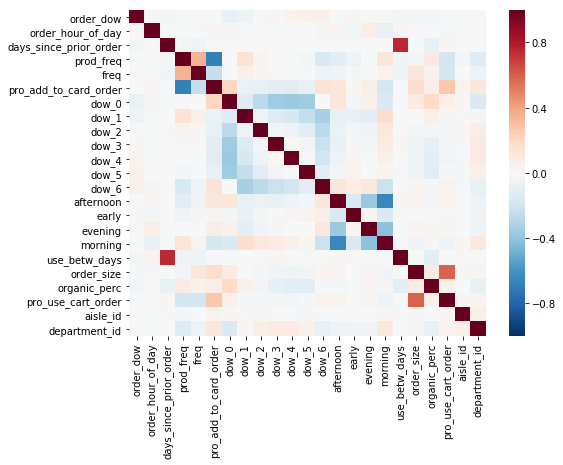

In [45]:
# features from 3rd round selection, 23 features in total
feature_list = ['order_dow', 'order_hour_of_day','days_since_prior_order', 'prod_freq',
       'freq', 'pro_add_to_card_order', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5', 'dow_6', 'afternoon', 'early',
       'evening', 'morning',  'use_betw_days', 'order_size', 'organic_perc',
       'pro_use_cart_order','aisle_id','department_id']
#correlation heatmap, check feature intercorrelation
pr_cor = pr_ord[feature_list].corr()
fig = plt.figure(figsize=(8,6))
sns.heatmap(pr_cor,vmin=-1,vmax=1,cmap='RdBu_r')
plt.show()

As feature "dow_6" and "early" can be calculated from other features, they are not kept as independent variables. Although user in-between days is correlated with days_since_prior_order, it represents user ordering habits and is kept as an indepedent variable.

<div class="alert alert-success">
After 3 round feature selection, 21 features were selected as independent variables to represent order information, user properties, product properties, and user-product properties.  

</div>

# Part 4: Modeling
- Try Logistic Regression first
- Then Random Forest, first round with default parameters and 2nd round with tuned parameters using Grid Search
- Last use Stochastic Gradient Descent
- Because the data is large for my personal computer, use a subsample to find the parameters and model

In [47]:
# dow_6 and early are removed from feature list, 21 features are kept
feature_list = ['order_dow', 'order_hour_of_day','days_since_prior_order', 'prod_freq',
       'freq', 'pro_add_to_card_order', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5', 'afternoon',
       'evening', 'morning',  'use_betw_days', 'order_size', 'organic_perc',
       'pro_use_cart_order','aisle_id','department_id']
# training set: use a subsample of "prior" datset to fit model and tune parameters (10% of original prior data)
X_train = pr_ord.sample(frac=0.1,random_state=12)[feature_list]
y_train = pr_ord.sample(frac=0.1,random_state=12)['reordered']
print(len(X_train))

750616


In [48]:
X_train.isna().sum()

order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
prod_freq                 0
freq                      0
pro_add_to_card_order     0
dow_0                     0
dow_1                     0
dow_2                     0
dow_3                     0
dow_4                     0
dow_5                     0
afternoon                 0
evening                   0
morning                   0
use_betw_days             0
order_size                0
organic_perc              0
pro_use_cart_order        0
aisle_id                  0
department_id             0
dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

**Pipeline includes two steps: scaling and modeling**

In [50]:
scaler = StandardScaler()
model = LogisticRegression(random_state=12)
pipeline = make_pipeline(scaler,model)

In [51]:
#model fit
pipeline.fit(X_train,y_train)
y_tr_pre = pipeline.predict(X_train)

print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))
print("area under roc curve on train set is:",roc_auc_score(y_train,y_tr_pre))

accuracy score on train set is: 0.7622206294563398
f1 score on train set is: 0.7850949596092045
area under roc curve on train set is: 0.7644140378161415


<div class="alert alert-success">
In the 3rd round feature selection, model performance on the training set is slightly lower than the first two rounds. That is because the first two rounds use features such as product reorder ratio which directly calculated from the "y", and that pollutes results.  
In the 3rd round, logistic regression yields decent results on the training set:  
accuracy score on train set is: 0.7622206294563398  
f1 score on train set is: 0.7850949596092045  
area under roc curve on train set is: 0.7644140378161415
</div>

# Part 5: Predict on test set

In [72]:
test_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [78]:
# construct feature matrix for test set
feature_train = ['user_id','product_id', 'prod_freq',
       'freq', 'pro_add_to_card_order', 'dow_0', 'dow_1',
       'dow_2', 'dow_3', 'dow_4', 'dow_5', 'afternoon',
       'evening', 'morning',  'use_betw_days', 'order_size', 'organic_perc',
       'pro_use_cart_order','aisle_id','department_id']
pr_ord_test = pr_ord[feature_train].drop_duplicates()
print(len(pr_ord_test))
pr_ord_test = pr_ord_test.merge(test_df,on='user_id',how='left')
pr_ord_test.drop('eval_set',axis=1,inplace=True)
pr_ord_test.info()

5546418
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5546418 entries, 0 to 5546417
Data columns (total 25 columns):
user_id                   object
product_id                int64
prod_freq                 float64
freq                      int64
pro_add_to_card_order     float64
dow_0                     float64
dow_1                     float64
dow_2                     float64
dow_3                     float64
dow_4                     float64
dow_5                     float64
afternoon                 float64
evening                   float64
morning                   float64
use_betw_days             float64
order_size                float64
organic_perc              float64
pro_use_cart_order        float64
aisle_id                  int64
department_id             int64
order_id                  float64
order_number              float64
order_dow                 float64
order_hour_of_day         float64
days_since_prior_order    float64
dtypes: float64(20), int64(4), object(

In [79]:
pr_ord_test = pr_ord_test.dropna().reset_index()
pr_ord_test.isna().sum()

index                     0
user_id                   0
product_id                0
prod_freq                 0
freq                      0
pro_add_to_card_order     0
dow_0                     0
dow_1                     0
dow_2                     0
dow_3                     0
dow_4                     0
dow_5                     0
afternoon                 0
evening                   0
morning                   0
use_betw_days             0
order_size                0
organic_perc              0
pro_use_cart_order        0
aisle_id                  0
department_id             0
order_id                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [80]:
# predict reorder on test data
X_test = pr_ord_test[feature_list]
y_test_pre = pipeline.predict(X_test)

In [81]:
# convert predicted results to required format
df_test = pd.DataFrame(y_test_pre)
df_test.columns = ['reorder']
print(df_test.head())
print(len(df_test))
result = pd.concat([pr_ord_test[['user_id','order_id','product_id']],df_test],axis=1)
print(result.head())
print(result.info())

   reorder
0        1
1        0
2        0
3        0
4        1
1740046
  user_id   order_id  product_id  reorder
0  174840    38977.0        9755        1
1  174840    38977.0       25466        0
2  174840    38977.0       45437        0
3   10951  1962375.0       36884        0
4   10951  1962375.0       48183        1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1740046 entries, 0 to 1740045
Data columns (total 4 columns):
user_id       object
order_id      float64
product_id    int64
reorder       int64
dtypes: float64(1), int64(2), object(1)
memory usage: 53.1+ MB
None


In [90]:
result_reorder = result[result['reorder']==1][['order_id','product_id']]
result_reorder = result_reorder.groupby('order_id')['product_id'].unique().reset_index(name='products')
test_df = test_df.merge(result_reorder,on='order_id',how='left')

print(test_df.head())
test_df[['order_id','products']].to_csv('C:/DS/Springboard/1st_capstone_project/lgr_submission.csv',header=True)

  order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0  2774568        3     test            13          5                 15   
1   329954        4     test             6          3                 12   
2  1528013        6     test             4          3                 16   
3  1376945       11     test             8          6                 11   
4  1356845       12     test             6          1                 20   

   days_since_prior_order                                    products  
0                    11.0  [39190, 47766, 21903, 17668, 18599, 23650]  
1                    30.0                                         NaN  
2                    22.0                                     [21903]  
3                     8.0   [44632, 20383, 27959, 8309, 33572, 13176]  
4                    30.0     [13176, 14992, 10863, 7076, 8239, 5746]  


<div class="alert alert-success">
The results from Logistic Regression were submitted to Kaggle, scoring 0.3317, compared to the 1st place of 0.4.
</div>

# Random Forest

In [93]:
#cross validation
#parameter tuning for random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
model = RandomForestClassifier()
steps = [('scaler',StandardScaler()),('model',RandomForestClassifier())]
pipeline = Pipeline(steps)
param_dict = {'model__n_estimators':[100,150],'model__max_depth':[5,10],'model__min_samples_leaf':[3,5],'model__max_features':[3,5],'model__random_state':[12]}

cv = GridSearchCV(pipeline,param_grid=param_dict,scoring='f1')

In [94]:
cv.fit(X_train,y_train)
print(cv.best_params_)
print(cv.best_score_)

{'model__max_depth': 5, 'model__max_features': 3, 'model__min_samples_leaf': 5, 'model__n_estimators': 150, 'model__random_state': 12}
0.7917893223738777


In [95]:
y_tr_pre = cv.predict(X_train)
print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))
print("area under roc curve on train set is:",roc_auc_score(y_train,y_tr_pre))

accuracy score on train set is: 0.7601503298624064
f1 score on train set is: 0.7919928182151138
area under roc curve on train set is: 0.7547594811199003


In [104]:
importances = cv.best_estimator_.named_steps["model"].feature_importances_
importances

array([5.98969228e-08, 1.97394568e-05, 4.10776402e-02, 1.10375632e-01,
       6.35342049e-01, 4.69360191e-02, 1.40179987e-03, 1.32286336e-02,
       6.55662555e-03, 4.02207747e-03, 2.34651345e-03, 1.84457818e-03,
       2.32966904e-03, 6.90841587e-04, 6.40850327e-03, 6.29467258e-02,
       1.40878991e-02, 3.33517137e-03, 3.68187238e-02, 2.09474750e-03,
       8.13635115e-03])

<div class="alert alert-success">
</p>After parameter tuning, random forest with a max depth of 5, estimators of 150, max feastures of 3 and min samples leaf of 5 returns the model with highest f1 score. The model's prediction on the train data is slightly better than the results from Logistic Regression with an f1 score of 0.79, while accuracy and auc under roc are slightly lower than those from Logistic Regression.  <p/>  
</p>Based on the feature importance score, add to cart order and product order frequency at user level are the most important features.<p/>  
</div>

In [107]:
# predict on test set
y_test_pre = cv.predict(X_test)

# convert to required format
df_test = pd.DataFrame(y_test_pre)
df_test.columns = ['reorder']

result = pd.concat([pr_ord_test[['user_id','order_id','product_id']],df_test],axis=1)

result_reorder = result[result['reorder']==1][['order_id','product_id']]
result_reorder = result_reorder.groupby('order_id')['product_id'].unique().reset_index(name='products')
test_df = test_df.merge(result_reorder,on='order_id',how='left')

print(test_df.head())
test_df[['order_id','products']].to_csv('C:/DS/Springboard/1st_capstone_project/rfc_submission.csv',header=True)

   reorder
0        1
1        1
2        0
3        0
4        1
1740046
  order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0  2774568        3     test            13          5                 15   
1   329954        4     test             6          3                 12   
2  1528013        6     test             4          3                 16   
3  1376945       11     test             8          6                 11   
4  1356845       12     test             6          1                 20   

   days_since_prior_order                                           products  
0                    11.0  [39190, 47766, 21903, 43961, 17668, 18599, 23650]  
1                    30.0                                                NaN  
2                    22.0          [38293, 20323, 21903, 45007, 11068, 8424]  
3                     8.0   [44632, 20383, 27959, 8309, 24799, 33572, 43352]  
4                    30.0            [13176, 14992, 10863, 7076, 8239, 574

<div class="alert alert-success">
Score of the results from Random Forest Classifier is 0.3335, slightly better than the results from Logistic Regression.
</div>

# Stochastic Gradient Descent

In [108]:
from sklearn.linear_model import SGDClassifier

In [117]:
#cross validation
#parameter tuning 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
scaler = StandardScaler()
sdg = SGDClassifier()
steps = [('scaler',StandardScaler()),('sdg',SGDClassifier())]
pipeline = Pipeline(steps)
param_dict = {'sdg__loss':['squared_hinge','log'],'sdg__alpha':[0.001,0.01],'sdg__max_iter':[500,1000],'sdg__random_state':[12]}

cv = GridSearchCV(pipeline,param_grid=param_dict,scoring='f1')

In [118]:
cv.fit(X_train,y_train)
print(cv.best_params_)
print(cv.best_score_)

{'sdg__alpha': 0.01, 'sdg__loss': 'log', 'sdg__max_iter': 500, 'sdg__random_state': 12}
0.7859129146486524


In [119]:
# evaluation performance of training set
y_tr_pre = cv.predict(X_train)
print("accuracy score on train set is:",accuracy_score(y_train,y_tr_pre))
print("f1 score on train set is:",f1_score(y_train,y_tr_pre))
print("area under roc curve on train set is:",roc_auc_score(y_train,y_tr_pre))

accuracy score on train set is: 0.7613826510492715
f1 score on train set is: 0.7859113380571253
area under roc curve on train set is: 0.7622414740360158


In [121]:
# predict on test set
y_test_pre = cv.predict(X_test)

# convert to required format
df_test = pd.DataFrame(y_test_pre)
df_test.columns = ['reorder']

result = pd.concat([pr_ord_test[['user_id','order_id','product_id']],df_test],axis=1)

result_reorder = result[result['reorder']==1][['order_id','product_id']]
result_reorder = result_reorder.groupby('order_id')['product_id'].unique().reset_index(name='products')
test_df = test_df.merge(result_reorder,on='order_id',how='left')

print(test_df.head())
test_df[['order_id','products']].to_csv('C:/DS/Springboard/1st_capstone_project/sgd_submission.csv',header=True)

  order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0  2774568        3     test            13          5                 15   
1   329954        4     test             6          3                 12   
2  1528013        6     test             4          3                 16   
3  1376945       11     test             8          6                 11   
4  1356845       12     test             6          1                 20   

   days_since_prior_order                                    products  
0                    11.0  [39190, 47766, 21903, 17668, 18599, 23650]  
1                    30.0                                         NaN  
2                    22.0                                     [21903]  
3                     8.0   [44632, 20383, 27959, 8309, 33572, 13176]  
4                    30.0     [13176, 14992, 10863, 7076, 8239, 5746]  


<div class="alert alert-success">
Score of the results from Stochastic Gradient Descent is 0.3326, slightly higher than the results from Logistic Regression but lower than the result from Random Forest Classifier.
</div>

# Additional feature
Potentially useful features but not included in current model due to computational limitation

In [ ]:
# this feature calcuates the in-between days of products at user level. It involves two main steps: 
# first calcuate cumulative order days of the user, then calculate in-between days based on frequency and cumulative days
# but this feature takes long time to run (> 5 hours),not used in the current model due to computational limit

# consective days
days_sel = pr_ord[['user_id','order_number','days_since_prior_order']].drop_duplicates()
d = {'days_since_prior_order':'consec_days'}
days_com = days_sel.rename(columns=d).groupby('user_id').cumsum()

days_com[['user_id','order_number']] = days_sel[['user_id','order_number']]
days_com = days_com.reset_index()
days_com.drop('index',axis=1,inplace=True)
print(days_com.head())

pr_ord = pr_ord.merge(days_com,on=['order_number','user_id'],how='left')
pr_ord.sort_values(['user_id', 'order_number'], ascending=[True, True])
print(pr_ord.head())
# define custom function to calculate in between days for products at user level
def days_inbetween(data):
    user_id = data['user_id']
    product_id = data['product_id']
    if data['freq'].mean() == 1:
        db = 9999
    elif data['freq'].mean() == 4:
        db = data['days_since_prior_order'].mean()
    elif data['freq'].mean() == 2:
        db = data['consec_days'].diff()
    else:
        db = data['consec_days'].diff().mean()
    new_df = pd.DataFrame({'user':user_id,'product':product_id,'days_betw_prod_user': db})
    return new_df 

# product purchase in-between days calculated using custom function
df_db = pr_ord[['user_id','product_id','freq','days_since_prior_order','consec_days']].groupby(['user_id','product_id'],as_index=False).apply(days_inbetween)
print(df_db.head())
#pr_ord = pr_ord.merge(df_db,on=['user_id','product_id'],how='left')
#pr_ord.head()


   order_number  consec_days   user_id
0          11.0         30.0  142903.0
1          49.0          3.0   18194.0
2          18.0         13.0  174840.0
3          21.0          8.0   68572.0
4          19.0         25.0   59897.0
   order_id  product_id  add_to_cart_order  reordered   user_id  eval_set  \
0         7       34050                  1          0  142903.0         1   
1         7       46802                  2          0  142903.0         1   
2        14       20392                  1          1   18194.0         1   
3        14       27845                  2          1   18194.0         1   
4        14         162                  3          1   18194.0         1   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0          11.0        2.0               14.0                    30.0   
1          11.0        2.0               14.0                    30.0   
2          49.0        3.0               15.0                     3.0   
3          